In [5]:
set.seed(1)
suppressPackageStartupMessages(require(rstan))
suppressPackageStartupMessages(require(ggplot2))
suppressPackageStartupMessages(require(dplyr))

### Setup

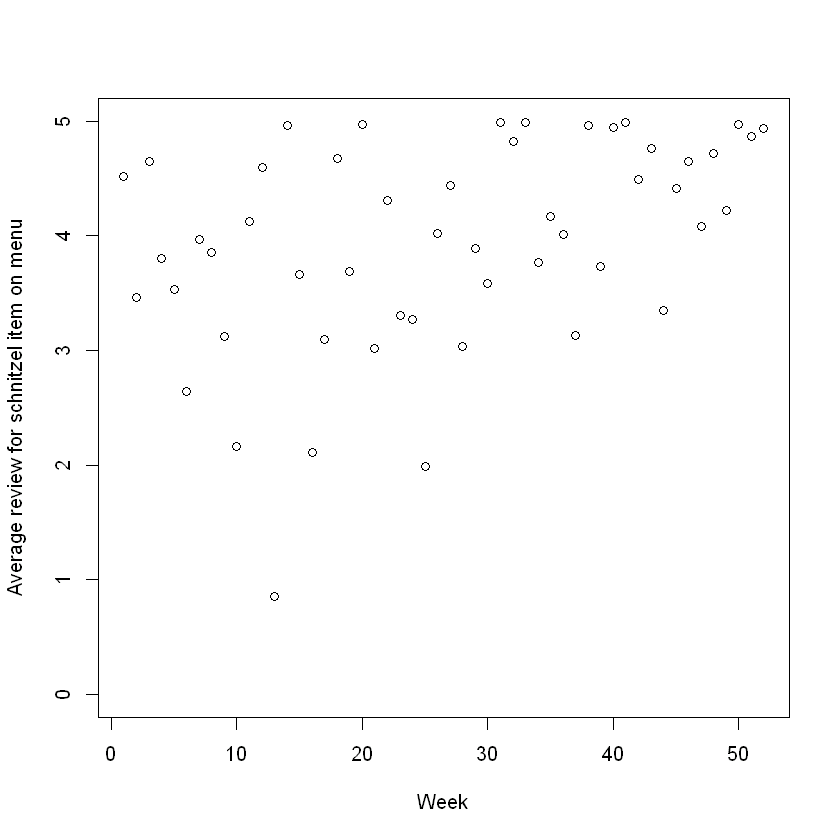

In [6]:
food_data = c(4.52, 3.46, 4.65, 3.8, 3.53, 2.64, 3.97, 3.86, 3.12, 2.16, 4.13, 4.6, 0.86,
    4.96, 3.66, 2.11, 3.1, 4.68, 3.69, 4.97, 3.02, 4.31, 3.31, 3.27, 1.99, 4.02,
    4.44, 3.04, 3.89, 3.59, 4.99, 4.82, 4.99, 3.77, 4.17, 4.01, 3.13, 4.96, 3.73, 4.95,
    4.99, 4.49, 4.76, 3.35, 4.41, 4.65, 4.08, 4.72, 4.22, 4.97, 4.87, 4.94)
plot(1:length(food_data), food_data, xlab = "Week", ylab = "Average review for schnitzel item on menu", 
ylim = c(0,5), xlim = c(1, 52))

In [7]:
log_joint = function(means, change_point, y) {
  
  # Return log(0.0) if parameters are outside of the support
  if (means[[1]] < 0.1 | means[[2]] < 0.1 | means[[1]] > 0.9 | means[[2]] > 0.9 | change_point < 1 | change_point > length(y)) 
    return(-Inf)
  
  log_prior = 
    dunif(means[[1]], 0.1, 0.9, log = TRUE) + 
    dunif(means[[2]], 0.1, 0.9, log = TRUE)
  
  log_likelihood = 0.0
  for (i in 1:length(y)) {
    mean = if (i < change_point) means[[1]] else means[[2]]
    log_likelihood = log_likelihood + dbeta(y[[i]]/5, mean*5, (1-mean)*5, log = TRUE)
  }
  
  return(log_prior + log_likelihood)
}

### Q1: A custom MCMC sampler

In [ ]:
# 3
mcmc = function(means, change_point, y, n_iterations) {
  change_point_trace = rep(-1, n_iterations)
  
  for (i in 1:n_iterations) {
    # TODO: implement a MCMC sampler
  }
  
  # Return:
  # - the trace of the change points (for question 1) 
  # - the means at the last iteration (for question 2)
  return(
    list(
      change_point_trace = change_point_trace, 
      last_iteration_means = means 
    )
  )
}

### Q2: MCMC correctness testing

In [ ]:
# 1
forward = function(synthetic_data_size) {
  
  # TODO: implement forward simulation
  
  return(list(
    means = means,
    change_point = change_point,
    data = data
  ))
}

In [ ]:
forward_posterior = function(synthetic_data_size, n_mcmc_iters) {
  initial = forward(synthetic_data_size)
  
  if (n_mcmc_iters > 0) {
    samples = mcmc(initial$means, initial$change_point, initial$data, n_mcmc_iters)
    return(samples$last_iteration_means[[1]])
  } else {
    return(initial$means[[1]])
  }
}

In [ ]:
# 2
# Note: we use synthetic datasets with only 5 observations to speed things up
forward_only = replicate(1000, forward_posterior(5, 0))
with_mcmc = replicate(1000, forward_posterior(5, 200))

# TODO: perform 2-samples t-test or Kolmogorov-Smirnov test
#       to see if forward_only and with_mcmc follow the same distribution. 

### Q3: Using your sampler for data analysis